In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import itertools
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.logging.set_verbosity(tf.logging.INFO)

In [4]:
import utils

utils.make_data()

In [3]:
model_data = pd.read_csv('data_train.csv')
model_data.head()

,Unnamed: 0,Unnamed: 0.1,open,high,close,low,volume,price_change,p_change,ma5,...,v_ma5,v_ma10,v_ma20,turnover,price_2,price_3,price_4,price_5,price_6,pred
0,203,203,0.180822,0.173021,0.168937,0.216155,0.018799,0.477083,-3.36,0.212258,...,0.084374,0.094004,0.132112,0.003446,0.173781,0.190736,0.178323,0.181956,0.187405,-1.0
1,204,204,0.180822,0.172434,0.177112,0.222601,0.017645,0.503472,1.39,0.215437,...,0.098104,0.101426,0.132363,0.003178,0.190736,0.178323,0.181956,0.187405,0.191341,-1.0
2,205,205,0.185997,0.176246,0.173781,0.221843,0.038892,0.456944,-6.60,0.217951,...,0.106497,0.103727,0.132814,0.007812,0.178323,0.181956,0.187405,0.191341,0.185892,-1.0
3,206,206,0.178387,0.195015,0.190736,0.221843,0.153164,0.524306,5.08,0.222239,...,0.103644,0.110154,0.131515,0.032625,0.181956,0.187405,0.191341,0.185892,0.189222,-1.0
4,207,207,0.184170,0.176246,0.178323,0.224498,0.029350,0.487500,-1.47,0.221056,...,0.080203,0.092323,0.116457,0.005744,0.187405,0.191341,0.185892,0.189222,0.181350,-1.0


In [3]:
COLUMNS = ["open","high","close","low","volume","price_change","p_change","ma5","ma10","ma20",
           "v_ma5","v_ma10","v_ma20","turnover","price_2","price_3","price_4","price_5","price_6","pred"]

FEATURES = ["open","high","close","low","volume","price_change","p_change","ma5","ma10","ma20",
            "v_ma5","v_ma10","v_ma20","turnover","price_2","price_3","price_4","price_5","price_6"]

LABEL = "pred"

In [4]:
def input_fn(data_set):
  feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
  labels = tf.constant(data_set[LABEL].values)
  return feature_cols, labels

In [10]:
def main():
    # Load datasets
    training_set = pd.read_csv("data_train.csv", skipinitialspace=True,skiprows=1, names=COLUMNS)
    test_set = pd.read_csv("data_test.csv", skipinitialspace=True,skiprows=1, names=COLUMNS)

    # load predict data set
    prediction_set = pd.read_csv("data_test.csv", skipinitialspace=True,skiprows=1, names=COLUMNS)

    # Feature cols
    feature_cols = [tf.contrib.layers.real_valued_column(k) for k in FEATURES]

    # Build deep learning neural networl
    regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, hidden_units=[1024,512,256,128,64,32,16],
                                            dropout=0.4,
                                            #optimizer=tf.train.ProximalAdagradOptimizer(learning_rate=0.1,
                                             #                                           l1_regularization_strength=0.001),
                                            model_dir="E:/python/data_model_d")

    # Fit
    regressor.fit(input_fn=lambda: input_fn(training_set), steps=10000)

    # Score accuracy
    ev = regressor.evaluate(input_fn=lambda: input_fn(test_set), steps=1)   
    loss_score = ev["loss"]
    print("Loss: {0:f}".format(loss_score))

    # Print out predictions
    y = regressor.predict(input_fn=lambda: input_fn(prediction_set))
    ytrain = regressor.predict(input_fn=lambda: input_fn(training_set))
    leng = len(prediction_set)
  
    # .predict() returns an iterator; convert to a list and print predictions
    predictions = list(itertools.islice(y, leng))
    predtrain = list(itertools.islice(ytrain, len(training_set)))
    print(predtrain)
    print("Predictions: {}".format(str(predictions)))

    a = prediction_set["pred"].values
    atrain = training_set["pred"].values

    return predictions ,a ,predtrain, atrain

In [11]:
predictions ,a, predtrain, atrain = main()

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_master': '', '_model_dir': 'E:/python/data_model_d', '_log_step_count_steps': 100, '_session_config': None, '_num_worker_replicas': 0, '_task_id': 0, '_tf_random_seed': None, '_num_ps_replicas': 0, '_is_chief': True, '_environment': 'local', '_save_summary_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001B451A540B8>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_evaluation_master': '', '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from E:/python/data_model_d\model.ckpt-10300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 10301 into E:/python/data_

INFO:tensorflow:loss = 1.0620127, step = 13601 (9.484 sec)
INFO:tensorflow:global_step/sec: 10.623
INFO:tensorflow:loss = 1.0552906, step = 13701 (9.414 sec)
INFO:tensorflow:global_step/sec: 11.7334
INFO:tensorflow:loss = 1.0135782, step = 13801 (8.523 sec)
INFO:tensorflow:global_step/sec: 12.0003
INFO:tensorflow:loss = 1.0982969, step = 13901 (8.333 sec)
INFO:tensorflow:global_step/sec: 11.9015
INFO:tensorflow:loss = 1.020471, step = 14001 (8.402 sec)
INFO:tensorflow:global_step/sec: 11.0723
INFO:tensorflow:loss = 1.0157582, step = 14101 (9.032 sec)
INFO:tensorflow:global_step/sec: 11.1255
INFO:tensorflow:loss = 0.95393306, step = 14201 (9.028 sec)
INFO:tensorflow:global_step/sec: 10.9561
INFO:tensorflow:loss = 1.0214536, step = 14301 (9.088 sec)
INFO:tensorflow:global_step/sec: 11.1879
INFO:tensorflow:loss = 0.92975694, step = 14401 (8.939 sec)
INFO:tensorflow:global_step/sec: 11.4047
INFO:tensorflow:loss = 0.9701274, step = 14501 (8.769 sec)
INFO:tensorflow:global_step/sec: 11.4099


INFO:tensorflow:Starting evaluation at 2018-03-14-14:56:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from E:/python/data_model_d\model.ckpt-20300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-03-14-14:56:32
INFO:tensorflow:Saving dict for global step 20300: global_step = 20300, loss = 1.9971511
Loss: 1.997151
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from E:/python/data_model_d\model.ckpt-20300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from E:/python/data_model_d\model.ckpt-20300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[-0.35453737, -0.51604927, -0.47124887, -0.46499765, -0.33415806, -0.3101493, 0.8543497, -0.5078989, -0.27310812, -0.51679397, 0.8543497, 0.61323774, 0.2097674, -0.47620738, 0.8543497, -0.48516417, 0.8543497, 0.8543497, 0.8543497, 0.00029730797, 0.8543497, 0.8543497, 0.8543497, 0.8543497, 0.8543497, -0.5171417, -0.13811928, -0.50993073, -0.48174322, -0.49623454, -0.45358884, -0.42479062, -0.09669101, 0.8543497, 0.18943548, -0.4799304, -0.4844185, -0.4726168, -0.4861244, -0.4626776, -0.51072085, -0.43039215, -0.465011, -0.4601797, -0.4816475, -0.5022813, 0.8543497, 0.8543497, 0.8543497, 0.8543497, -0.19274366, 0.8543497, -0.43060863, 0.8543497, -0.45159996, 0.8543497, 0.8543497, -0.42242658, -0.47143853, -0.4011097, -0.40537512, -0.39670908, -0.4188193, -0.4245329, -0.3415662, 0.8543497, 

In [7]:
def plot(predictions, a):
  #plot
  leng = len(predictions)
  plt.figure(1)
  x = np.linspace(1,leng,leng)
  y = np.linspace(0,0,leng)
  
  i = 0
  correct = 0
  total = 0
  while i < leng:
  #  if a[i] > 1:
       total = total + 1
       if a[i] * predictions[i] > 0:
          correct = correct + 1
       i = i + 1
  print("correction is: %d / %d" %(correct,total))

  plt.plot( x, a, 'r')
  plt.plot(x,predictions,'g')
  plt.plot( x, y, 'y')
  plt.show()

correction is: 99 / 200


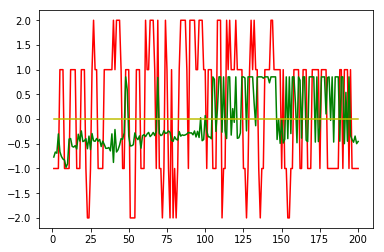

In [14]:
plot(predictions, a)

correction is: 801 / 877


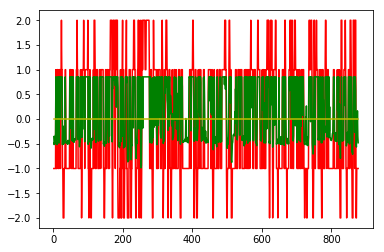

In [15]:
plot(predtrain, atrain)